In [3]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [7]:
#Carga de dataset
data = pd.read_csv('/content/test-data.csv')

In [ ]:
print(data)

      Unnamed: 0                                               Name  \
0              0                            Maruti Alto K10 LXI CNG   
1              1                      Maruti Alto 800 2016-2019 LXI   
2              2          Toyota Innova Crysta Touring Sport 2.4 MT   
3              3                               Toyota Etios Liva GD   
4              4                                  Hyundai i20 Magna   
...          ...                                                ...   
1229        1229                  Volkswagen Vento Diesel Trendline   
1230        1230                             Volkswagen Polo GT TSI   
1231        1231                             Nissan Micra Diesel XV   
1232        1232                             Volkswagen Polo GT TSI   
1233        1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   

        Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0          Delhi  2014              40929       CNG       Manual    

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [9]:
columnas_eliminar = ['New_Price']
simbolo = 'Lakh'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [10]:
print(data)

      Unnamed: 0                                               Name  \
0              0                            Maruti Alto K10 LXI CNG   
1              1                      Maruti Alto 800 2016-2019 LXI   
2              2          Toyota Innova Crysta Touring Sport 2.4 MT   
3              3                               Toyota Etios Liva GD   
4              4                                  Hyundai i20 Magna   
...          ...                                                ...   
1229        1229                  Volkswagen Vento Diesel Trendline   
1230        1230                             Volkswagen Polo GT TSI   
1231        1231                             Nissan Micra Diesel XV   
1232        1232                             Volkswagen Polo GT TSI   
1233        1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   

        Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0          Delhi  2014              40929       CNG       Manual    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [12]:

# Suponiedo que 'data' es DataFrame
columna_categorica = 'New_Price'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  Price              179 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 115.8+ KB


In [17]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [18]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [19]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [20]:
#resultado
print(data)

      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0      413         4  2014              40929          0             1   
1      408         3  2013              54493          3             1   
2      723         9  2017              34000          1             1   
3      689         5  2012             139000          1             1   
4      333         9  2014              29000          3             1   
...    ...       ...   ...                ...        ...           ...   
1229   758         5  2011              89411          1             1   
1230   745         9  2015              59000          3             0   
1231   582         8  2012              28000          1             1   
1232   745        10  2013              52262          3             0   
1233   536         7  2014              72443          1             0   

      Owner_Type  Mileage  Engine  Power  Seats  Price  
0              0      294     102    163    4.0    NaN

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   int64  
 1   Location           1234 non-null   int64  
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   int64  
 5   Transmission       1234 non-null   int64  
 6   Owner_Type         1234 non-null   int64  
 7   Mileage            1234 non-null   int64  
 8   Engine             1234 non-null   int64  
 9   Power              1234 non-null   int64  
 10  Seats              1223 non-null   float64
 11  Price              179 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 115.8 KB


In [22]:
#llenar datos vacios
columnas_especificas = ['Price', 'Seats']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   int64  
 1   Location           1234 non-null   int64  
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   int64  
 5   Transmission       1234 non-null   int64  
 6   Owner_Type         1234 non-null   int64  
 7   Mileage            1234 non-null   int64  
 8   Engine             1234 non-null   int64  
 9   Power              1234 non-null   int64  
 10  Seats              1234 non-null   float64
 11  Price              1234 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 115.8 KB


In [33]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [25]:
print(X)
print('-'*25)
print(y)

      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0      413         4  2014              40929          0             1   
1      408         3  2013              54493          3             1   
2      723         9  2017              34000          1             1   
3      689         5  2012             139000          1             1   
4      333         9  2014              29000          3             1   
...    ...       ...   ...                ...        ...           ...   
1229   758         5  2011              89411          1             1   
1230   745         9  2015              59000          3             0   
1231   582         8  2012              28000          1             1   
1232   745        10  2013              52262          3             0   
1233   536         7  2014              72443          1             0   

      Owner_Type  Mileage  Engine  Power  Seats  
0              0      294     102    163    4.0  
1          

In [26]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [41]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)
print (y)

      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0      413         4  2014              40929          0             1   
1      408         3  2013              54493          3             1   
2      723         9  2017              34000          1             1   
3      689         5  2012             139000          1             1   
4      333         9  2014              29000          3             1   
...    ...       ...   ...                ...        ...           ...   
1229   758         5  2011              89411          1             1   
1230   745         9  2015              59000          3             0   
1231   582         8  2012              28000          1             1   
1232   745        10  2013              52262          3             0   
1233   536         7  2014              72443          1             0   

      Owner_Type  Mileage  Engine  Power  Seats  
0              0      294     102    163    4.0  
1          

In [72]:
columnas_seleccionadas = list(range(0, 11)) + list(range(1, 11))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 11]
m = y.size

In [73]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [74]:
print(X)

[[ 1.          0.14231844 -0.53870012 ...  1.96370764  0.29699856
  -1.56347364]
 [ 1.          0.11948443 -0.86811338 ...  1.80209316  0.18223737
  -0.3463328 ]
 [ 1.          1.55802719  1.10836616 ...  0.83240626 -0.95262323
   2.08794888]
 ...
 [ 1.          0.91410805  0.7789529  ... -0.55747829  0.37350601
  -0.3463328 ]
 [ 1.          1.65849685  1.43777942 ... -1.04232173 -1.66669283
  -0.3463328 ]
 [ 1.          0.70403514  0.44953965 ...  0.60614599 -0.67209589
  -0.3463328 ]]


In [75]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [76]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.82283985e+01 -1.88301009e-01  1.27002450e-01 -9.50679797e-02
  2.86470995e-02 -7.76294011e-01 -1.25304506e+00 -2.99215385e-01
 -1.01470958e+00  1.83961936e-03 -8.70374359e-02 -3.17012883e-01]
El valor predecido es (usando el descenso por el gradiente): 18.9261


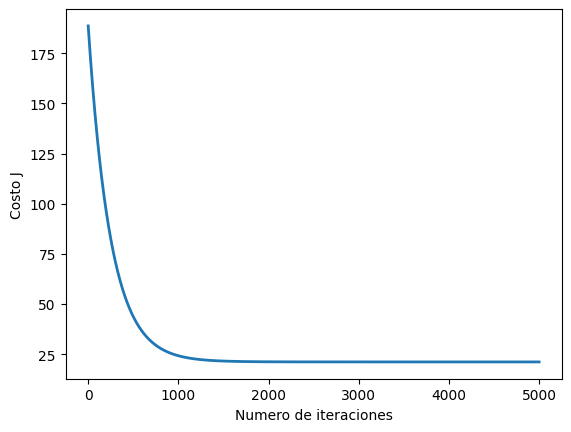

In [92]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un auto con distintas caracteristicas
X_array = [1, 420, 5, 2011, 40787, 1, 0, 1, 311, 105, 170, 5]
X_array[1:12] = (X_array[1:12] - mu) / sigma
price = np.dot(X_array, theta)

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [93]:
X_array = [1, 420, 5, 2011, 40787, 1, 0, 1, 311, 105, 170, 5]
X_array[1:12] = (X_array[1:12] - mu) / sigma

In [94]:
X_array[1:12]

[0.17428605635855438,
 -0.20928686671652647,
 -0.7551960934899663,
 -0.49798087667661367,
 -0.9310994374175195,
 -1.6585414913168295,
 0.7981267666488626,
 1.914469494394365,
 2.060676327462255,
 0.3862572566637559,
 -0.346332797687634]

In [95]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [97]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 420, 5, 2011, 40787, 1, 0, 1, 311, 105, 170, 5]
price = np.dot(X_array, theta)

print('Precio predecido para un auto (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.82292179e+01 -1.87712881e-01  1.27525390e-01 -8.82119636e-02
  2.69337740e-02 -7.88520525e-01 -1.24155762e+00 -2.98063238e-01
 -1.03595899e+00  6.41483349e-03 -7.83325132e-02 -3.32174562e-01]
Precio predecido para un auto (usando la ecuación de la normal): $524
